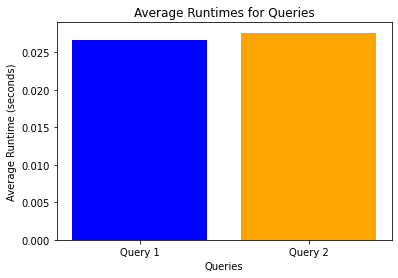

In [31]:
import time
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
connection = pymysql.connect(
    host='34.94.165.202',
    user='root',
    password='thereisnopassword',
    database='banking_system'
)

# Query 1
query1 = """
    SELECT t.TransactionID, t.TransactionType, t.Amount, t.TransactionDate, t.TransferAccountID, a.AccountID, a.AccountNumber, a.AccountType
    FROM Transaction t 
    INNER JOIN Account a ON t.AccountID = a.AccountID
    -- WHERE t.TransactionDate >= NOW() - INTERVAL 90 DAY;
"""

# Query 2
query2 = """
    SELECT t.TransactionID, t.TransactionType, t.Amount, t.TransactionDate, t.TransferAccountID, a.AccountID, a.AccountNumber, a.AccountType
    FROM Account a
    INNER JOIN Transaction t ON t.AccountID = a.AccountID
    -- WHERE t.TransactionDate >= NOW() - INTERVAL 90 DAY;
"""

# Function to execute and explain a query
def execute_and_explain(query):
    with connection.cursor() as cursor:
        cursor.execute("EXPLAIN " + query)
        result = cursor.fetchall()

# Number of times to run the code
num_runs = 50
total_runtime_query1 = 0
total_runtime_query2 = 0

for _ in range(num_runs):
    start_time = time.time()
    execute_and_explain(query1)
    total_runtime_query1 += time.time() - start_time

    start_time = time.time()
    execute_and_explain(query2)
    total_runtime_query2 += time.time() - start_time

# Calculate average runtimes
average_runtime_query1 = total_runtime_query1 / num_runs
average_runtime_query2 = total_runtime_query2 / num_runs

# Plotting the results
queries = ['Query 1', 'Query 2']
average_runtimes = [average_runtime_query1, average_runtime_query2]

plt.bar(queries, average_runtimes, color=['blue', 'orange'])
plt.xlabel('Queries')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtimes for Queries')


plt.show()


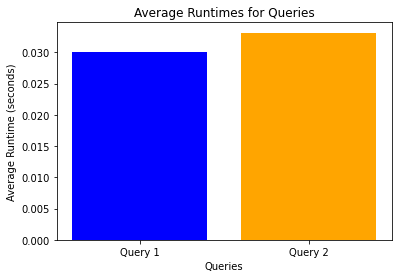

In [7]:
import time
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
connection = pymysql.connect(
    host='34.94.165.202',
    user='root',
    password='thereisnopassword',
    database='banking_system'
)

# Query 1
query1 = """
    SELECT T.*, A.AccountNumber, P.Name
    FROM Transaction T
    JOIN Account A ON T.AccountID = A.AccountID
    JOIN Person P ON A.PersonID = P.PersonID
    WHERE A.CurrentBalance < 1000;


"""

# Query 2
query2 = """
    SELECT T.*, A.AccountNumber, P.Name
    FROM Transaction T
    JOIN Account A ON T.AccountID = A.AccountID
    JOIN Person P ON A.PersonID = P.PersonID
    WHERE A.PersonID IN (SELECT PersonID FROM Account WHERE CurrentBalance < 1000);


"""

# Function to execute and explain a query
def execute_and_explain(query):
    with connection.cursor() as cursor:
        cursor.execute("EXPLAIN " + query)
        result = cursor.fetchall()

# Number of times to run the code
num_runs = 10
total_runtime_query1 = 0
total_runtime_query2 = 0

for _ in range(num_runs):
    start_time = time.time()
    execute_and_explain(query1)
    total_runtime_query1 += time.time() - start_time

    start_time = time.time()
    execute_and_explain(query2)
    total_runtime_query2 += time.time() - start_time

# Calculate average runtimes
average_runtime_query1 = total_runtime_query1 / num_runs
average_runtime_query2 = total_runtime_query2 / num_runs

# Plotting the results
queries = ['Query 1', 'Query 2']
average_runtimes = [average_runtime_query1, average_runtime_query2]

plt.bar(queries, average_runtimes, color=['blue', 'orange'])
plt.xlabel('Queries')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtimes for Queries')


plt.show()


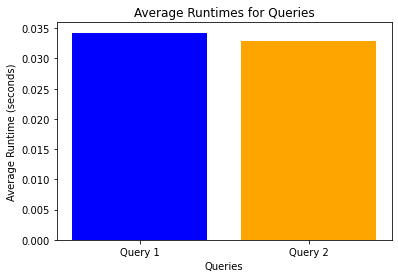

In [10]:
import time
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
connection = pymysql.connect(
    host='34.94.165.202',
    user='root',
    password='thereisnopassword',
    database='banking_system'
)

# Query 1
query1 = """
    SELECT *
    FROM Person
    WHERE YEAR(DOB) > 1980;
"""

# Query 2
query2 = """
    SELECT *
    FROM Person
    WHERE DOB > '1980-01-01';
"""

# Function to execute and explain a query
def execute_and_explain(query):
    with connection.cursor() as cursor:
        cursor.execute("EXPLAIN " + query)
        result = cursor.fetchall()

# Number of times to run the code
num_runs = 10
total_runtime_query1 = 0
total_runtime_query2 = 0

for _ in range(num_runs):
    start_time = time.time()
    execute_and_explain(query1)
    total_runtime_query1 += time.time() - start_time

    start_time = time.time()
    execute_and_explain(query2)
    total_runtime_query2 += time.time() - start_time

# Calculate average runtimes
average_runtime_query1 = total_runtime_query1 / num_runs
average_runtime_query2 = total_runtime_query2 / num_runs

# Plotting the results
queries = ['Query 1', 'Query 2']
average_runtimes = [average_runtime_query1, average_runtime_query2]

plt.bar(queries, average_runtimes, color=['blue', 'orange'])
plt.xlabel('Queries')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtimes for Queries')


plt.show()
